# Domain invariant representation

## Problem statement
Consider we have the following graphical model in our domain generalization problem:

<img src="imgs/domain_gen.png" alt="Graphical model" style="width: 300px;"/>

Where $p(d,x,y,z)=p(d)p(y)p(x|d,y)p(z|x)$

Meaning that for a domain $d\sim p(d)$, we have a dataset for that task: $(x^{(d)}_i,y^{(d)}_i)_{i=1}^{n_d}$ where $(x^{(d)}_i,y^{(d)}_i) \in p(x,y|d)$. We want to learn a representation $z$ ($p(z|x)$) that can be used to predict $y$ and generalizable between domains.

Here $p(x|d_1)$ and $p(y|x,d_1)$ are usually different from $p(x|d_2)$ and $p(y|x,d_2)$.

## What is a domain-invariant representation? 

<b>Definition 1: Marginal alignment</b> If $p(z|d)$ is constant w.r.t. $d$   (e.g. $p(z|d_1)=p(z|d_2) \quad\forall z,d_1,d_2$)

<b>Definition 2: Conditional alignment</b> If $p(y|z,d)$ is constant w.r.t. $d$ (e.g. $p(y|z,d_1)=p(y|z,d_2) \quad\forall y,z,d_1,d_2$)


Note that some method define a "domain-free representation $z$" (e.g. DIVA) with $I(z,d)=0$. We can show that this condition is only equivalent to the Marginal alignment condition.

<b>Remark 1:</b> The representation $z$ satisfies $I(z,d)=0$ if and only if it satisfies the marginal alignment condition.

<b>Proof 1:</b>

- If $I(z,d)=0 \implies p(z|d)=p(z) \implies p(z|d)$ is fixed w.r.t. $d$

- If $p(z|d)$ is fixed w.r.t. $d$ then
\begin{equation}
    p(z) = \int p(z|d)p(d) dd = p(z|d)\int p(d) dd = p(z|d)\\
    \implies I(z,d)=0
\end{equation}

This means by learning a domain-free representation, we are only aligning the marginal distribution, not the conditional distribution. <b>Thus, how to learn a representation that satisfy both alignments?</b>

## An example of marginal alignment without conditional alignment:



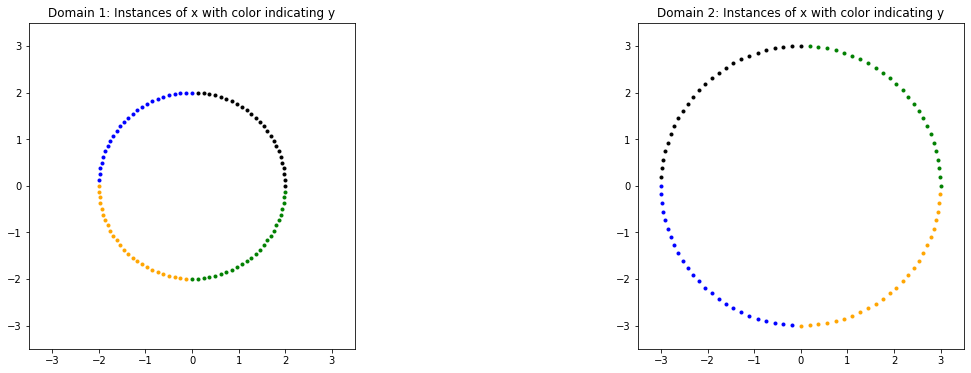

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig=plt.figure(figsize=(20,6))

alpha = np.arange(0,2*np.pi,np.pi/50)[:,None]

x1 = np.concatenate([np.cos(alpha),np.sin(alpha)],1)*2

fig.add_subplot(1, 2, 1, title='Domain 1: Instances of x with color indicating y', xlim=(-3.5,3.5),ylim=(-3.5,3.5),aspect=1)
plt.scatter(x1[0:25,0],x1[0:25,1],marker='.',color='black')
plt.scatter(x1[25:50,0],x1[25:50,1],marker='.',color='blue')
plt.scatter(x1[50:75,0],x1[50:75,1],marker='.',color='orange')
plt.scatter(x1[75:100,0],x1[75:100,1],marker='.',color='green')

x2 = np.concatenate([np.cos(alpha+np.pi/2),np.sin(alpha+np.pi/2)],1)*3

fig.add_subplot(1, 2, 2, title='Domain 2: Instances of x with color indicating y', xlim=(-3.5,3.5),ylim=(-3.5,3.5),aspect=1)
plt.scatter(x2[0:25,0],x2[0:25,1],marker='.',color='black')
plt.scatter(x2[25:50,0],x2[25:50,1],marker='.',color='blue')
plt.scatter(x2[50:75,0],x2[50:75,1],marker='.',color='orange')
plt.scatter(x2[75:100,0],x2[75:100,1],marker='.',color='green')

plt.show()
plt.close()


fig=plt.figure(figsize=(11,5))

z1 = x1/np.linalg.norm(x1,2,1)[:,None]

fig.add_subplot(1, 2, 1, title='Domain 1: z = x/||x||_2 with color indicating y', xlim=(-3.5,3.5),ylim=(-3.5,3.5),aspect=1)
plt.scatter(x1[0:25,0],x1[0:25,1],marker='.',color='black')
plt.scatter(x1[25:50,0],x1[25:50,1],marker='.',color='blue')
plt.scatter(x1[50:75,0],x1[50:75,1],marker='.',color='orange')
plt.scatter(x1[75:100,0],x1[75:100,1],marker='.',color='green')

plt.scatter(z1[0:25,0],z1[0:25,1],marker='.',color='black')
plt.scatter(z1[25:50,0],z1[25:50,1],marker='.',color='blue')
plt.scatter(z1[50:75,0],z1[50:75,1],marker='.',color='orange')
plt.scatter(z1[75:100,0],z1[75:100,1],marker='.',color='green')

z2 = x2/np.linalg.norm(x2,2,1)[:,None]

fig.add_subplot(1, 2, 2, title='Domain 2: z = x/||x||_2 with color indicating y', xlim=(-3.5,3.5),ylim=(-3.5,3.5),aspect=1)
plt.scatter(x2[0:25,0],x2[0:25,1],marker='.',color='black')
plt.scatter(x2[25:50,0],x2[25:50,1],marker='.',color='blue')
plt.scatter(x2[50:75,0],x2[50:75,1],marker='.',color='orange')
plt.scatter(x2[75:100,0],x2[75:100,1],marker='.',color='green')

plt.scatter(z2[0:25,0],z2[0:25,1],marker='.',color='black')
plt.scatter(z2[25:50,0],z2[25:50,1],marker='.',color='blue')
plt.scatter(z2[50:75,0],z2[50:75,1],marker='.',color='orange')
plt.scatter(z2[75:100,0],z2[75:100,1],marker='.',color='green')


plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("ex.pdf", bbox_inches = 'tight',
    pad_inches = 0)
# plt.show()
plt.close()

## How to learn z
Now we assume that for every domains $d_1,d_2 \sim p(d)$, we have an invertible and differentiable transformation that transform the density $p(x_1|y,d_1)$ to $p(x_2|y,d_2)$. In other words, there is an invertible transformation $f_{d_1,d_2}$ from domain $d_1$ to $d_2$ (with the corresponding inverse $f_{d_2,d_1}$) such that: 

$x_1 \rightarrow x_2=f_{d_1,d_2}(x_1)$

and $p(x_2|y,d_2)=p(x_1|y,d_1)\left|det J_{f_{d_2,d_1}(x_2)}\right|^{-1}$ (change of variable theorem)

Marginalize both size over $y$, we also get:

$p(x_2|d_2)=p(x_1|d_1)\left|det J_{f_{d_2,d_1}(x_2)}\right|^{-1}$

An example of this is the family of domains used in [DIVA](http://proceedings.mlr.press/v121/ilse20a/ilse20a.pdf), where each domain is a fixed-angle rotation of MNIST.
<img src="imgs/domain_mnist.png" alt="MNIST domains" style="width: 300px;"/>

For real dataset, we can think of $f$'s as the GAN models that transform images from one domain to another. It is proven that such GAN models transform the density of the source domain to the density of the target domain.


<b>Theorem 1:</b> If we have a representation $z$ such that $p(z|x)=p(z|f_{d,d'}(x)) \forall d,d',x\sim p(x|d)$, then the representation $z$ satisfies both the marginal and conditional alignment.

<b>Proof:</b>
- First note that there always exists such representation. Some examples are:

$p(z|x)=\delta_0(z)$

or $p(z|x)=\mathcal{N}(z;0,1)$

These representations are meaningless (contains no information about $x$), but they do satisfy that $p(z|x)=p(z|f_{d,d'}(x)) \forall d,d'$.

since $p(z|d) = \int p(z|x)p(x|d)dx = \int const p(x|d)dx = const \int p(x|d)dx = const$,

and $p(y|z,d) = p(y|d) = p(y)$

- Marginal alignment:

\begin{equation}
\begin{split}
p(z|d)&=\int p(x|d)p(z|x)dx \\
&= \int p(x'|d')\left|\det J_{f_{d',d}}(x')\right|^{-1}p(z|f_{d',d}(x'))df_{d',d}(x') \quad\quad\text{where }x'=f_{d,d'}(x) \text{ so } x=f_{d',d}(x')\\
&= \int p(x'|d')\left|\det J_{f_{d',d}}(x')\right|^{-1}p(z|x')[\det J_{f_{d',d}}(x')]dx'\\
&= \int p(x'|d')p(z|x')dx'\\
&= p(z|d')
\end{split}
\end{equation}

- Conditional alignment:

\begin{equation}
\begin{split}
p(y|z,d) &= \frac{p(z,y|d)}{p(z|d)} \\ \\
p(z,y|d) &= \int p(y|d)p(x|y,d)p(z|x)dx \\
&= \int p(y)p(x'|y,d')\left|\det J_{f_{d',d}}(x')\right|^{-1}p(z|f_{d',d}(x'))df_{d',d}(x') \quad\quad\text{where }x'=f_{d,d'}(x)\\
&= \int p(y)p(x'|y,d')\left|\det J_{f_{d',d}}(x')\right|^{-1}p(z|x')[\det J_{f_{d',d}}(x')]dx'\\
&= \int p(y)p(x'|y,d')p(z|x')dx'\\
&= p(y,z|d')
\end{split}
\end{equation}


<br/><br/><br/><br/><br/><br/>
### Learning objective:
With the above theorem, we can learn a representation $z=g_\theta(x)$ that satisfies both alignment by:

\begin{equation}
\mathbb{E}_{d\sim p(d)} \left[\mathbb{E}_{(x,y)\sim p(x,y|d)}\left[l(y,g_\theta(x))  + \mathbb{E}_{d'\sim p(d)}[||g_\theta(x)-g_\theta(f_{d,d'}(x))||_2]\right] \right] 
\end{equation}

Where $f_{d,d'}$ can be learn by StarGAN.

## Results: MNIST Rotation

Rotated MNIST has 6 domains rotation 0, 15, 30, 45, 60 and 75 degree. Train with 5 domains and test with the remaining domain.

| Model | 0 | 15 | 30 | 45 | 60 | 75| Avg |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Base (normal training) |  |  |  |  |  | 90.2 |  |
| DA (Ganin et al., 2015) | 86.7 | 98.0 | 97.8 | 97.4 | 96.9 | 89.1 | 94.3 |
| LG (Shankar et al., 2018) | 89.7 | 97.8 | 98.0 | 97.1 | 96.6 | 92.1 | 95.3 |
| HEX (Wang et al., 2019) | 90.1 | 98.9 | 98.9 | 98.8 | 98.3 | 90.0 | 95.8 |
| ADV (Wang et al., 2019) | 89.9 | 98.6 | 98.8 | 98.7 | 98.6 | 90.4 | 95.2 |
| CSD (Piratla et al., 2020) | - | - | - | - | - | - | 97.8 |
| DIVA (Isle et al., 2020) | 93.5 | 99.3 | 99.1 | 99.2 | 99.3 | 93.0 | 97.2 |
|  |  |  |  |  |  |  |  |
| Ours (real $f$)|  <b>98.4</b> | <b>99.6</b> | <b>99.8</b> | <b>99.6</b> | <b>99.7</b> | <b>97.9</b> | <b>99.2</b> |
| Ours ($f$ learned by GAN)| <b>97.3</b> | <b>99.3</b> | <b>99.2</b> | <b>99.3</b> | <b>99.1</b> | <b>97.2</b> | <b>98.6</b> |

## Results: PACS
Resnet18: PACS has 4 domains photo, carton, sketch, art painting. Train on 3 domains and test on the remaining domain.

| Model | Art painting | Cartoon | Photo | Sketch | Average |
| --- | --- | --- | --- | --- | --- |
| AGG | 77.6 | 73.9 | 94.4 | 74.3 | 79.1 |
| MLDG | 79.5 | 77.3 | 94.3 | 71.5 | 80.7 |
| Metareg | 83.7 | 77.2 | 95.5 | 70.4 | 81.7 |
| JiGen | 79.42 | 75.25 | 96.03 | 71.35 | 79.14 |
| CSD | 78.9 | 75.8 | 94.1 | 76.7 | 81.4 |
| DMG | 76.90 | 80.38 | 93.35 | 75.21 | 81.46 |
|  |  |  |  |  |  |
| Ours ($f$ learned by GAN) | 81.7 | 76.2 | 95.2 | 81.0 | 83.5 |

## Results: OfficeHome
Resnet18: OfficeHome has 4 domains art, clipart, product, real. Train on 3 domains and test on the remaining domain.

| Model | art | clipart | product | real | Average |
| --- | --- | --- | --- | --- | --- |
| AGG | 52.15 | 45.86 | 70.86.4 | 73.15 | 60.51 |
| JiGen (Carlucci et al., 2019) | 53.04 | 47.51 | 71.47 | 72.79 | 61.20 |
| RSC (Huang et al., 2020) | 58.42 | 47.90 | 71.63 | 74.54 | 63.12 |
|  |  |  |  |  |  |
| Ours ($f$ learned by GAN) | 55.8 | 52.3 |  |  |  |


\begin{equation}
x \sim p_X(x) = \mathcal{N}(x;1,1)\\
y = -x\\
p_Y(y) = p_X(-y)\left|\frac{d(-y)}{dy}\right| = p_X(-y) \\
1 = \int_{-\infty}^{\infty} p_Y(y)dy = \int_{-\infty}^{\infty} p_X(-y)dy = - \int_{-\infty}^{\infty} p_X(-y)d(-y) = - \int_{\infty}^{-\infty} p_X(x)dx = 1
\end{equation}